<a href="https://colab.research.google.com/github/Venkat262005/Mental_Health_Predicter/blob/main/Mental_Health_Predicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Random Forest Model Evaluation ---
Accuracy: 0.871

Classification Report:
                    precision    recall  f1-score   support

   Normal/Minimal       1.00      0.67      0.80         3
    Mild symptoms       0.92      1.00      0.96        11
Moderate symptoms       0.86      0.92      0.89        13
  Severe symptoms       0.67      0.50      0.57         4

         accuracy                           0.87        31
        macro avg       0.86      0.77      0.80        31
     weighted avg       0.87      0.87      0.86        31



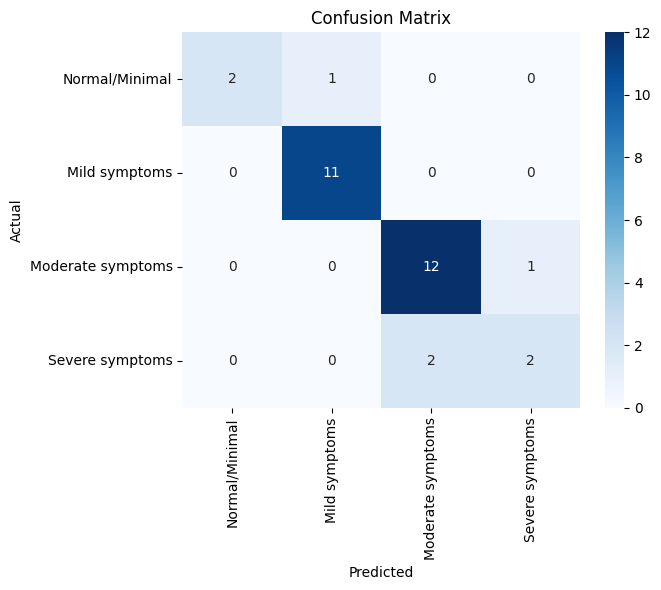

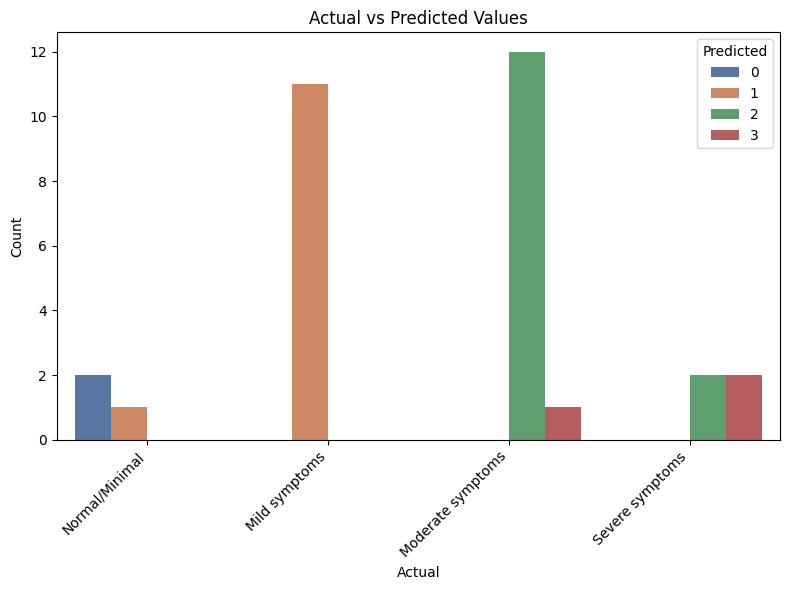

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_name = "Mental Health150 - Dataset - Form Responses 1 (1).csv"
RANDOM_SEED = 42

df = pd.read_csv(file_name)
df.columns = df.columns.str.strip().str.replace('\n', '', regex=False)

symptom_cols = [
    'loss_of_interest', 'feeling_down', 'sleep_issues', 'low_energy',
    'appetite_change', 'low_self_worth', 'concentration_issue', 'restlessness',
    'nervousness', 'uncontrolled_worry', 'irritability', 'fear_of_bad'
]

frequency_mapping = {
    'Not at all': 0, 'Several days': 1, 'Several Days': 1,
    'More than half the days': 2, 'Nearly every day': 3
}
outcome_mapping = {
    'Normal/Minimal': 0, 'Mild symptoms': 1,
    'Moderate symptoms': 2, 'Severe symptoms': 3
}
sleep_hours_mapping = {
    '< 4hrs': 0, '4 -6 hrs': 1, '7 - 9 hrs': 2, 'More than 9 hrs': 3
}
outcome_labels = list(outcome_mapping.keys())

for col in symptom_cols:
    df[col + '_encoded'] = df[col].map(frequency_mapping)

df['Outcome_encoded'] = df['Outcome'].map(outcome_mapping)
df['sleep_hours_encoded'] = df['sleep_hours'].map(sleep_hours_mapping)
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

feature_cols = [col + '_encoded' for col in symptom_cols] + ['Age', 'sleep_hours_encoded', 'Gender_Male']
target_col = 'Outcome_encoded'

df_model = df.dropna(subset=[target_col] + feature_cols)

X = df_model[feature_cols]
y = df_model[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=outcome_labels, zero_division=0)
print("--- Random Forest Model Evaluation ---")
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=outcome_labels,
            yticklabels=outcome_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

actual_pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
counts = actual_pred_df.value_counts().reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(x="Actual", y="Count", hue="Predicted", data=counts, palette='deep')
plt.xticks(ticks=range(4), labels=outcome_labels, rotation=45, ha='right')
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.show()


## Model Conclusion and Results

The Random Forest model was trained to classify mental health outcomes into four categories: 'Normal/Minimal', 'Mild symptoms', 'Moderate symptoms', and 'Severe symptoms'.

### Overall Performance
- **Accuracy:** The model achieved an overall accuracy of **87.1%** on the test set. This indicates that the model correctly predicted the outcome for approximately 87 out of 100 cases.

### Detailed Classification Report

```
                   precision    recall  f1-score   support

   Normal/Minimal       1.00      0.67      0.80         3
    Mild symptoms       0.92      1.00      0.96        11
Moderate symptoms       0.86      0.92      0.89        13
  Severe symptoms       0.67      0.50      0.57         4

         accuracy                           0.87        31
        macro avg       0.86      0.77      0.80        31
     weighted avg       0.87      0.87      0.86        31
```

**Interpretation of Metrics:**
- **Precision:** The proportion of positive identifications that were actually correct. For example, 100% precision for 'Normal/Minimal' means all predictions for this class were correct.
- **Recall (Sensitivity):** The proportion of actual positives that were identified correctly. For example, 100% recall for 'Mild symptoms' means the model correctly identified all actual 'Mild symptoms' cases.
- **F1-Score:** The harmonic mean of precision and recall, providing a single metric that balances both.
- **Support:** The number of actual occurrences of the class in the test set.

**Key Observations from Classification Report:**
- The model performs exceptionally well for **'Normal/Minimal'** and **'Mild symptoms'**, with high precision and recall, leading to strong f1-scores.
- For **'Moderate symptoms'**, the performance is also very good, showing a good balance between precision and recall.
- The performance for **'Severe symptoms'** is comparatively lower, particularly in terms of recall (50%) and f1-score (0.57). This suggests the model struggles to correctly identify all instances of severe symptoms, potentially misclassifying them as other categories.

### Confusion Matrix

The confusion matrix visually represents the correct and incorrect predictions made by the model.

<img src="/tmp/Confusion Matrix.png" alt="Confusion Matrix" width="500"/>

**Observations from Confusion Matrix:**
- **Normal/Minimal (Class 0):** 2 out of 3 actual 'Normal/Minimal' cases were correctly classified. One case was misclassified as 'Mild symptoms'.
- **Mild symptoms (Class 1):** All 11 actual 'Mild symptoms' cases were correctly classified.
- **Moderate symptoms (Class 2):** 12 out of 13 actual 'Moderate symptoms' cases were correctly classified. One case was misclassified as 'Severe symptoms'.
- **Severe symptoms (Class 3):** Only 2 out of 4 actual 'Severe symptoms' cases were correctly classified. The other 2 were misclassified as 'Moderate symptoms'. This confirms the lower recall for this class.

### Actual vs Predicted Values Plot

<img src="/tmp/Actual vs Predicted Values.png" alt="Actual vs Predicted Values" width="500"/>

**Observations from Actual vs Predicted Plot:**
- The bars show the distribution of predicted outcomes for each actual outcome category.
- The plot reinforces the findings from the confusion matrix, clearly showing where the model made correct predictions (diagonal bars) and where misclassifications occurred (off-diagonal bars). For instance, for 'Severe symptoms' (Actual=3), a significant portion was predicted as 'Moderate symptoms' (Predicted=2).

### Summary

The Random Forest model demonstrates strong predictive capabilities for 'Normal/Minimal', 'Mild symptoms', and 'Moderate symptoms' categories. However, there is a clear area for improvement in identifying 'Severe symptoms', where the model tends to underpredict. Future work could focus on techniques to improve the detection of the 'Severe symptoms' class, possibly through resampling minority classes, using different model architectures, or collecting more data for this specific category.